In [1]:
import os
import datajoint as dj

In [2]:
import pathlib

In [4]:
import os
os.chdir(r'C:\Users\thinh\Documents\TN-Vathes\Vathes\dj-elphys')

In [10]:
import matplotlib.pyplot as plt

In [5]:
from ephys import reference, acquisition, tracking, behavior, ephys, analysis, ingestion

Connecting thinh@datajoint.it.ntnu.no:3306


In [6]:
animal = dj.create_virtual_module('mlims', dj.config['custom'].get('mlims.database'))

In [7]:
img_dir = pathlib.Path(r'C:\Users\thinh\Documents\TN-Vathes\Moser\dj-docs\images\ephys_pipeline')

# The Ephys Pipeline

## Session Overview

In [26]:
erd = dj.ERD(reference.ElectrodeConfig.Electrode) - 1 + reference.ElectrodeConfig.ElectrodeGroup + reference.ProbeModel

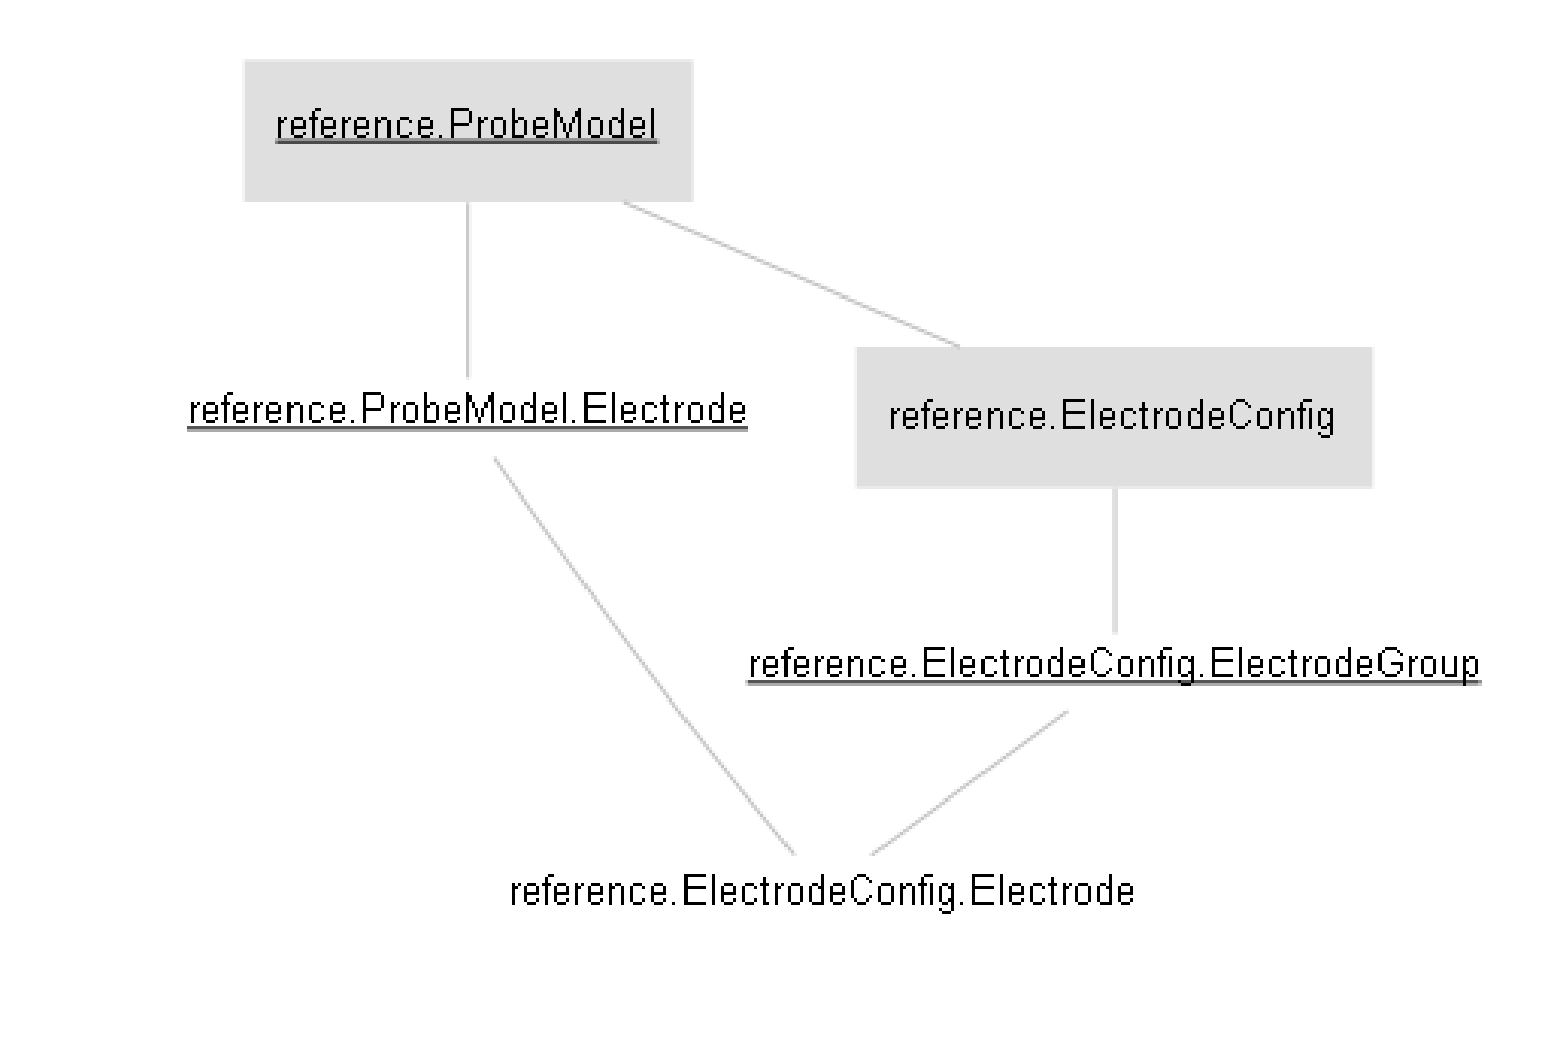

In [27]:
z = plt.figure(dpi=300)
erd.draw()
z.savefig((img_dir/'econfig.png').as_posix(), dpi=300)

In [ ]:
erd.make_dot().create_png

In [ ]:
erd.save((img_dir/'animal_session.svg').as_posix())

In [ ]:
session_erd = ((dj.ERD(acquisition.Session) - 1) 
               + (dj.ERD(acquisition.Recording))
               + (dj.ERD(tracking.Tracking))
               + (dj.ERD(behavior.Task) - 1))
session_erd

In [ ]:
session_erd.save((img_dir/'session_overview_erd.png').as_posix())

## Session Detail

In [ ]:
session_detail_erd = ((dj.ERD(acquisition.Session)) 
                      + (dj.ERD(acquisition.Session.Directories))
                      + (dj.ERD(acquisition.Session.TrackingSystemSetup))
                      + (dj.ERD(reference.TrackingSystemSetup) + 1)
                      + (dj.ERD(acquisition.Session.Experimenter))
                      - (dj.ERD(ingestion))
                     )
session_detail_erd

In [ ]:
session_detail_erd.save((img_dir/'session_detail_erd.png').as_posix())

## Recording Detail

In [ ]:
rec_detail_erd = ((dj.ERD(acquisition.Recording) - 1)
                  + (dj.ERD(acquisition.Recording) + 1)
                  - (dj.ERD(ephys.UnitSpikeTimes))
                     )
rec_detail_erd

In [ ]:
rec_detail_erd.save((img_dir/'recording_detail_erd.png').as_posix())

## Clustering

In [ ]:
clustering_erd = ((dj.ERD(ephys.CuratedClustering) - 2)
                  + (dj.ERD(ephys.CuratedClustering) + 2)
                  + (dj.ERD(acquisition.ClusterSessionGroup.GroupMember) - 1)
                 - (dj.ERD(ingestion))
                  - (dj.ERD(ephys.FinalizedClustering))
                  - (dj.ERD(reference))
                  + (dj.ERD(reference.Experimenter))
                 )
clustering_erd

In [ ]:
clustering_erd.save((img_dir/'clustering_erd.png').as_posix())

In [ ]:
clustering_detail_erd = ((dj.ERD(ephys.Clustering) - 2)
                  + (dj.ERD(ephys.CuratedClustering) + 2)
                  + (dj.ERD(acquisition.ClusterSessionGroup.GroupMember) - 1)
                 - (dj.ERD(ingestion))
                  - (dj.ERD(ephys.FinalizedClustering))
                 )
clustering_detail_erd

In [ ]:
clustering_detail_erd.save((img_dir/'clustering_detail_erd.png').as_posix())

## Spikes and Tracking

In [ ]:
spike_track_erd = ((dj.ERD(ephys.UnitSpikeTimes) - 1) 
                   + (dj.ERD(tracking.ProcessedTracking) - 1) 
                   + (dj.ERD(ephys.SpikesTracking))
                   - (dj.ERD(ephys.SkippedSpikesTracking))
                   + (dj.ERD(analysis.TaskSpikesTracking) - 1)
                   - (dj.ERD(analysis.analysis_param))
                 )
spike_track_erd

In [ ]:
spike_track_erd.save((img_dir/'spike_track_erd.png').as_posix())

In [ ]:
from ephys import ingestion

In [ ]:
ingestion_erd = ((dj.ERD(ingestion.ExecutingSessionRequest) - 2)
                 + (dj.ERD(ingestion.ProcessedSessionRequest) + 1)
                 + (dj.ERD(ingestion.ProbeAssociation))
                 )
ingestion_erd

In [ ]:
ingestion_erd.save((img_dir/'ingestion_erd.png').as_posix())

In [ ]:
session_rec_tracing_erd = ((dj.ERD(acquisition.Session))
                           + (dj.ERD(acquisition.Session.NeurologgerProbeAssociation))
                           + (dj.ERD(acquisition.Session.NeuropixelsProbeAssociation))
                           + (dj.ERD(acquisition.Session.TetrodeProbeAssociation))
                           + (dj.ERD(acquisition.Recording) - 1)
                           + (dj.ERD(acquisition.ProbeInsertion))
                           + (dj.ERD(acquisition.Recording.RecordingSync))
                           + (dj.ERD(tracking.Tracking))
                           + (dj.ERD(tracking.Tracking.TrackingSync))
                 )
session_rec_tracing_erd

In [ ]:
session_rec_tracing_erd.save((img_dir/'session_rec_tracing_erd.png').as_posix())

In [ ]:
clustering_request_erd = dj.ERD(ingestion.CuratedClusteringRequest) + dj.ERD(ingestion.ProcessedCuratedClusteringRequest)
clustering_request_erd

In [ ]:
clustering_request_erd.save((img_dir/'clustering_request_erd.png').as_posix())

In [ ]:
dj.ERD(ephys.ClusteringSetup) + 2 + dj.ERD(ephys.Unit)